In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
from scipy.stats import norm

# Waffle plot

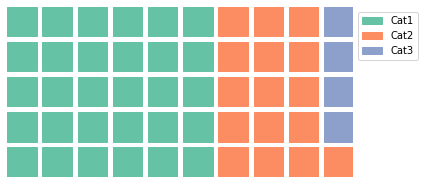

In [2]:
# alternative to a pie chart
plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,
    values={'Cat1': 30, 'Cat2': 16, 'Cat3': 4},     # counts of each categorical variable
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
);

# Histogram

In [3]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


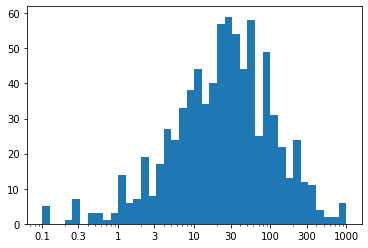

In [4]:
# Get the ticks for bins between [0 - maximum weight]
bins = 10**np.arange(-1, 3 + 0.1, 0.1)

# Generate the x-ticks you want to apply (hard-coded approximation - precise version is in the next cell)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displayed dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=pokemon, x='weight', bins=bins)

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels);

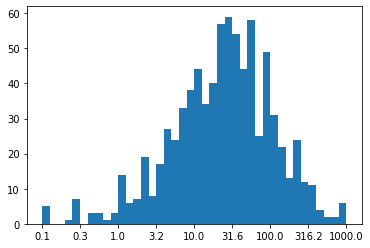

In [5]:
# now the precise version.....10 ** 0.5 ~= 0.3 and so on....

# Get the ticks for bins between [0 - maximum weight] - but in log scale
bins = np.arange(-1, 3 + 0.1, 0.1)

# Generate the x-ticks you want to apply - now in log scale with half a unit step change
ticks = np.arange(-1, 3 + 0.5, 0.5)

# Convert ticks into string values, to be displayed dlong the x-axis - but in data scale
labels = ['{}'.format(round(10**v, 1)) for v in ticks]

# Plot the histogram - in log scale
plt.hist(pokemon['weight'].apply(np.log10), bins=bins)

# Apply x-ticks - position in log scale but labelling in data scale
plt.xticks(ticks, labels);

# Heatmap

In [6]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


__A heatmap is a 2D histogram - both count plots__

array([[ nan,  nan,   5.,  31.,  nan,  nan,  nan],
       [ nan,  49., 515.,  89.,  25.,  14.,   9.],
       [  7., 505., 610.,  93.,  29.,   2.,  nan],
       [ 25., 504.,  22.,  nan,  nan,  nan,  nan],
       [ 75., 656.,  37.,  nan,  nan,  nan,  nan],
       [120.,  95.,  nan,  nan,  nan,  nan,  nan],
       [111.,  12.,  nan,  nan,  nan,  nan,  nan],
       [117.,  16.,  nan,  nan,  nan,  nan,  nan],
       [148.,   6.,  nan,  nan,  nan,  nan,  nan],
       [  2.,  nan,  nan,  nan,  nan,  nan,  nan]])

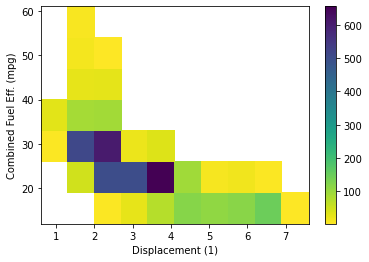

In [7]:
# Specify bin edges
bins_x = np.arange(0.6, 7 + 0.7, 0.7)
bins_y = np.arange(12, 58 + 7, 7)

# plot 2d histogram (i.e. count) along the two bin edges
h2d = plt.hist2d(data=fuel_econ,
                 x='displ',
                 y='comb',
                 cmin=0.5,   # set a minimum bound of counts
                 cmap='viridis_r',  # '_r' to reverse the color palette
                 bins=[bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

# Select the bi-dimensional histogram, a 2D array of samples x and y.
# Values in x are histogrammed along the first dimension and
# values in y are histogrammed along the second dimension.
counts = h2d[0]

counts  # each grid cell represents the count of x-y combo

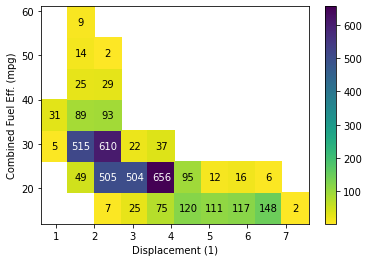

In [8]:
'''-----------------copied from above-----------------'''
bins_x = np.arange(0.6, 7 + 0.7, 0.7)
bins_y = np.arange(12, 58 + 7, 7)

h2d = plt.hist2d(data=fuel_econ,
                 x='displ',
                 y='comb',
                 cmin=0.5,
                 cmap='viridis_r',
                 bins=[bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

counts = h2d[0]
'''-----------------copied from above-----------------'''

# Add text annotation on each cell
for i in range(counts.shape[0]):  # grid cells start from the bottom left corner
    for j in range(counts.shape[1]):
        c = counts[i, j]
        if c >= 200:  # increase visibility on darker cells
            plt.text(bins_x[i] + 0.35,
                     bins_y[j] + 3.5,
                     int(c),
                     ha='center',
                     va='center',
                     color='white')
        elif c > 0:
            plt.text(bins_x[i] + 0.35,
                     bins_y[j] + 3.5,
                     int(c),
                     ha='center',
                     va='center',
                     color='black')

__seaborn $heatmap$__

displ_bins 
 ['bin_0: 0.6', 'bin_1: 1.3', 'bin_2: 2.0', 'bin_3: 2.7', 'bin_4: 3.4', 'bin_5: 4.1', 'bin_6: 4.8', 'bin_7: 5.5', 'bin_8: 6.2', 'bin_9: 6.9', 'bin_10: 7.6'] 

comb_bins 
 ['bin_0: 12.0', 'bin_1: 19.0', 'bin_2: 26.0', 'bin_3: 33.0', 'bin_4: 40.0', 'bin_5: 47.0', 'bin_6: 54.0', 'bin_7: 61.0']


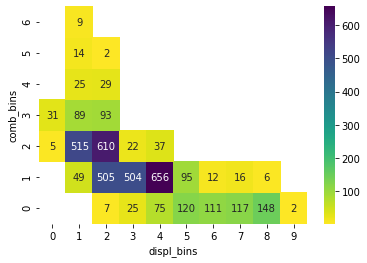

In [9]:
# define bin edges
bins_x = np.arange(0.6, 7 + 0.7, 0.7)  # for displ
bins_y = np.arange(12, 58 + 7, 7)  # for comb

# convert continuous variables to discrete (by bining) for heatmap
xbin_idxs = pd.cut(fuel_econ['displ'],
                   bins_x,
                   right=False,  # to avoid error converting inf to int
                   include_lowest=True,
                   labels=False).astype(int)  # remove interval labelling, need to label with int
ybin_idxs = pd.cut(fuel_econ['comb'],
                   bins_y,
                   right=False,
                   include_lowest=True,
                   labels=False).astype(int)

comb_displ_counts = fuel_econ.groupby([xbin_idxs, ybin_idxs]).size()
comb_displ_counts = comb_displ_counts.reset_index(name='count')
to_plot = comb_displ_counts.pivot(index='comb', columns='displ', values='count')

ax = sns.heatmap(to_plot,
                 annot=True,
                 fmt='.0f',
                 cmap='viridis_r');

ax.invert_yaxis()  # reverse top-bottom order
ax.set_xlabel('displ_bins')
ax.set_ylabel('comb_bins');

print('displ_bins', '\n', ['bin_{}: {:.1f}'.format(i, j) for i, j in enumerate(bins_x)], '\n')
print('comb_bins',  '\n', ['bin_{}: {:.1f}'.format(i, j) for i, j in enumerate(bins_y)])

In [10]:
# The existing `trans` column has multiple sub-types of Automatic and Manual
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

# Get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()

# Convert the series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')  # name the aggregated column

# Rearrange the data, to have vehicle class on rows
ct_counts = ct_counts.pivot(index='VClass', columns='trans_type', values='count')

ct_counts.head()

trans_type,Automatic,Manual
VClass,,
Compact Cars,784,338
Large Cars,605,20
Midsize Cars,989,199
Minicompact Cars,188,133
Subcompact Cars,502,171


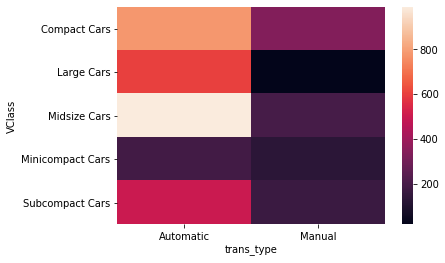

In [11]:
# bivariate heatmap with colorbar representing the counts
sns.heatmap(ct_counts);

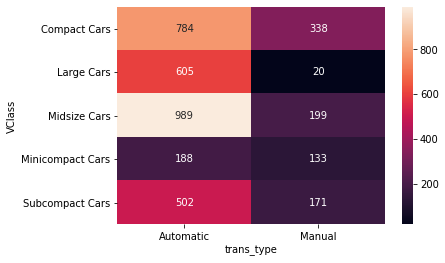

In [12]:
# Add text annotation on each cell
sns.heatmap(ct_counts, annot=True, fmt='.0f');

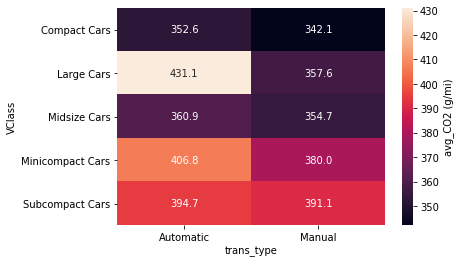

In [13]:
# Add a third variable CO2 to the heatmap,
# so the cells show the mean CO2 values (multivariate) instead of counts (bivariate),
# and the colorbar shows intensity of the third variable instead of the two in the main

# prepare the third variable - mean of CO2 for each main variable
mean_co2 = fuel_econ.groupby(['VClass', 'trans_type'])['co2'].mean()
mean_co2 = mean_co2.reset_index(name='avg_co2')

# make a pivot table of the three variables for heatmap
to_plot = mean_co2.pivot(index='VClass',
                         columns='trans_type',
                         values='avg_co2')

# heatmap with annotation
sns.heatmap(to_plot,
            annot=True,
            fmt='.1f',
            cbar_kws={'label': 'avg_CO2 (g/mi)'});

# Violin plot

In [14]:
fuel_econ['VClass'].dtype

dtype('O')

In [15]:
# Ordered car classes from small to large
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
vclasses = pd.api.types.CategoricalDtype(ordered=True,
                                         categories=sedan_classes)

# Convert the "VClass" column from a plain object type into an ordered categorical type for plot later
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

In [16]:
fuel_econ['VClass'].dtype

CategoricalDtype(categories=['Minicompact Cars', 'Subcompact Cars', 'Compact Cars',
                  'Midsize Cars', 'Large Cars'],
, ordered=True)

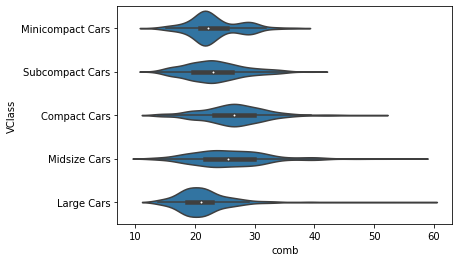

In [17]:
# violin plot with box plot on the inner
base_color = sns.color_palette()[0]    # otherwise too colourful
sns.violinplot(data=fuel_econ, x='comb', y='VClass', color=base_color);

<!-- Bar chart -->

# Bar chart

__counting qualitative vs. qualitative (bivariate) with seaborn $countplot$__

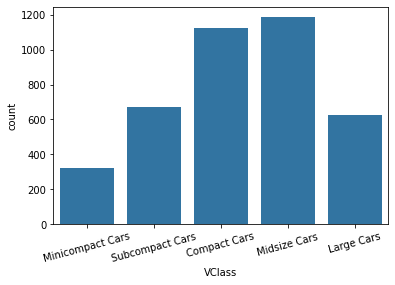

In [18]:
sns.countplot(data=fuel_econ, x='VClass', color=sns.color_palette()[0])  # univariate bar chart
plt.xticks(rotation=15);

__set a $hue$ parameter in these plots to include a second variate__

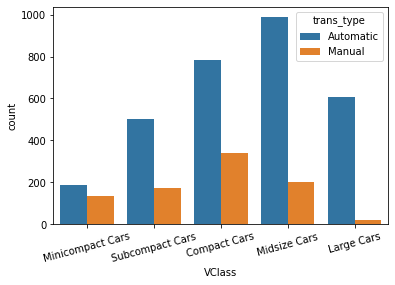

In [19]:
sns.countplot(data=fuel_econ, x='VClass', hue='trans_type')  # bivariate bar chart with 'hue'
plt.xticks(rotation=15);

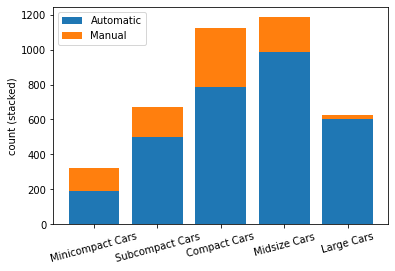

In [20]:
# stacked bar chart, absolute counts
x_cat = fuel_econ['VClass'].cat.categories  # previously set as ordered categorical dtype
stacked_cat = fuel_econ['trans_type'].unique()
num_x = len(x_cat)
num_stack = len(stacked_cat)

# base of stacks - all zeros
baselines = np.zeros(num_x)

# for each second-variable (stack) category:
for i in range(num_stack):
    # isolate the counts under each stack category,
    trans_type = stacked_cat[i]
    inner_counts = fuel_econ[fuel_econ['trans_type'] == trans_type]['VClass'].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x=np.arange(num_x),
            height=inner_counts[x_cat],
            bottom=baselines)
    # stack the next on top
    baselines += inner_counts[x_cat]

plt.xticks(np.arange(num_x), x_cat, rotation=15)
plt.ylabel('count (stacked)')
plt.legend(stacked_cat);

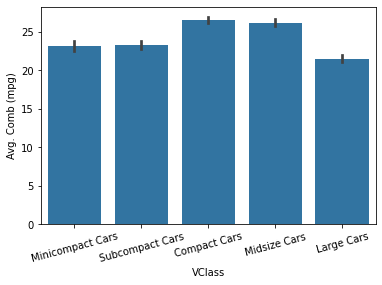

In [21]:
# seaborn barplot shows the mean statistics of a categorical variable
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=sns.color_palette()[0], ci=99)
plt.xticks(rotation=15)
plt.ylabel('Avg. Comb (mpg)');  
# error bars show ci (confidence interval) in sample means (i.e. with bootstrapping)

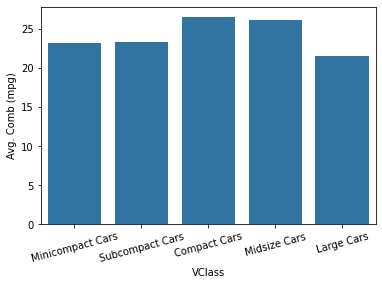

In [22]:
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=sns.color_palette()[0], ci=None)
plt.xticks(rotation=15)
plt.ylabel('Avg. Comb (mpg)');  # disable error bars by setting ci to None

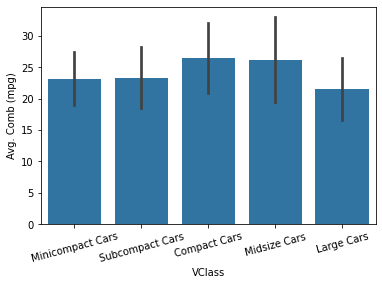

In [23]:
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=sns.color_palette()[0], ci='sd')
plt.xticks(rotation=15)
plt.ylabel('Avg. Comb (mpg)');  # shows sample mean and sample std (i.e. no bootstrapping)

# Point plot

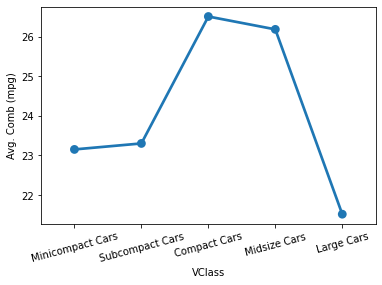

In [24]:
# scatterplot with points joined by lines
sns.pointplot(data=fuel_econ, x='VClass', y='comb', color=sns.color_palette()[0], ci=None)   # disable error bars
plt.xticks(rotation=15);
plt.ylabel('Avg. Comb (mpg)');

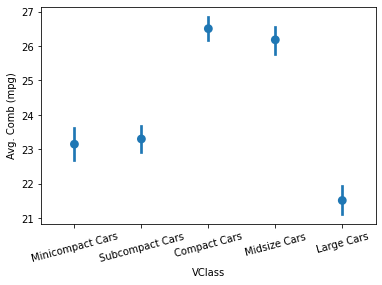

In [25]:
sns.pointplot(data=fuel_econ, x='VClass', y='comb', color=sns.color_palette()[0], linestyles="")
# remove the line by setting linestyles to empty
# default confidence interval ci at 95
plt.xticks(rotation=15);
plt.ylabel('Avg. Comb (mpg)');

# Facet plot

__Rather than depicting the relationship between one numeric variable and one categorical variable using a violin plot or box plot, we could use faceting to look at a histogram of the numeric variable for subsets of the data divided by categorical variable levels.__

__$FacetGrid$ is particularly useful to depict multivariates__

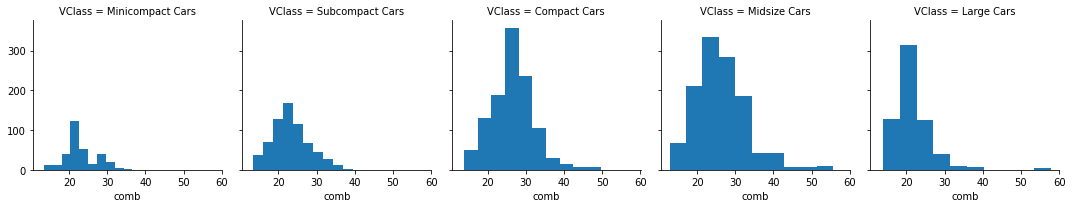

In [26]:
g = sns.FacetGrid(data = fuel_econ, col = 'VClass')   # defaul to share x & y
g.map(plt.hist, "comb");

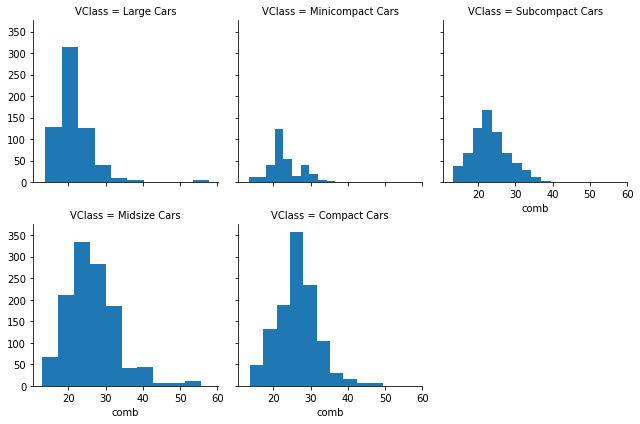

In [27]:
# Find the order in which you want to display the Facets
# For each vehicle class, find the combined fuel efficiency
group_means = fuel_econ[['VClass', 'comb']].groupby(['VClass']).mean()

# Select only the list of vehicle class in the increasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending=True).index

# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sns.FacetGrid(data=fuel_econ,
                  col='VClass',
                  col_wrap=3,
                  col_order=group_order)     
g.map(plt.hist, 'comb');     

So the least fuel efficiency class is the large car

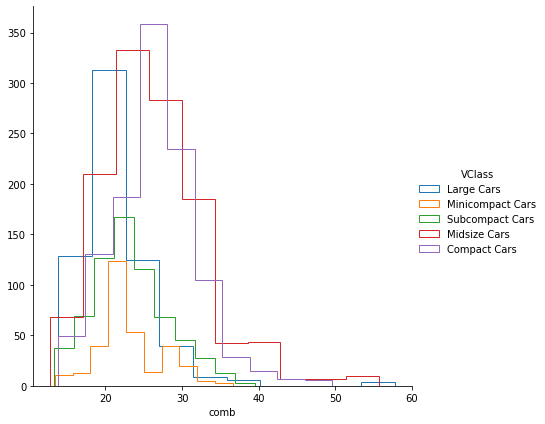

In [28]:
g = sns.FacetGrid(data=fuel_econ,
                  hue='VClass',    # setting a 'hue' instead of 'col' for overlapped facet plot
                  hue_order=group_order,
                  height = 6)     
g.map(plt.hist, 'comb', histtype = 'step');    # hollow bars with histtype setting
g.add_legend();

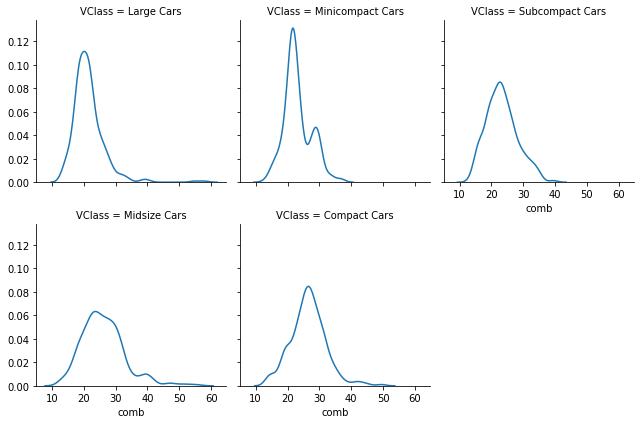

In [29]:
# change the facet map from histogram to kde plot
g = sns.FacetGrid(data=fuel_econ,
                  col='VClass',
                  col_wrap=3,
                  col_order=group_order)     
g.map(sns.kdeplot, 'comb'); 

__stack the above vertically to make a ridgeline plot (via mapping seaborn $kdeplot$ to row-wise $FacetGrid$)__

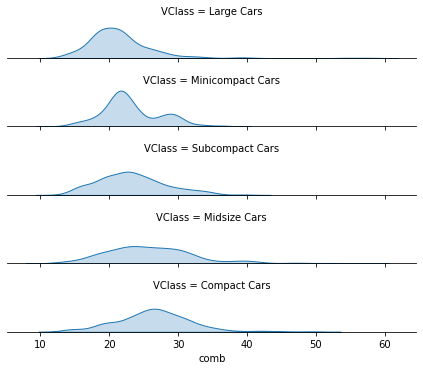

In [30]:
# first, change the form of the distribution plots from histograms to kernel density estimates,
# second, we need to facet the levels by rows so that they're all stacked up on top of one another
g = sns.FacetGrid(data=fuel_econ,
                  row='VClass',
                  height=1.05, 
                  aspect=6,
                  row_order=group_order)     
g.map(sns.kdeplot, 'comb', shade=True);

# some cosmetics for ridgeline plot:
# remove the y-axes
g.set(yticks=[])
g.despine(left=True); 

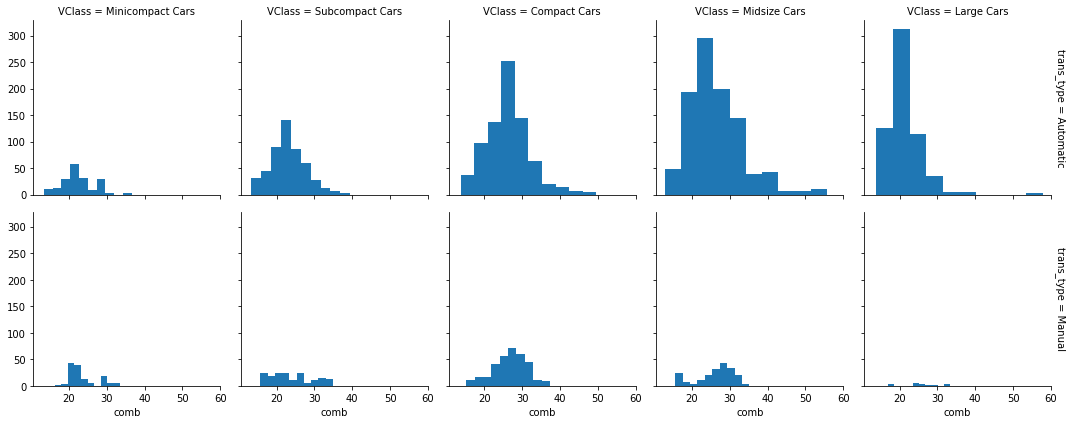

In [31]:
# facet two marginal variables against one main variable (map histograms)
g = sns.FacetGrid(data=fuel_econ,
                  col='VClass',
                  row='trans_type',
                  margin_titles=True)  # place labels separately on the top and right margins of the facet grid   
g.map(plt.hist, 'comb');

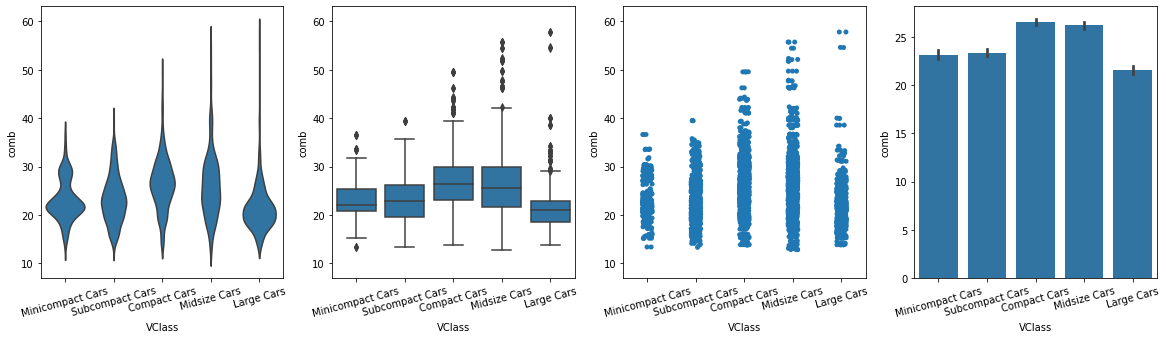

In [32]:
# subplots != facet plot
plt.figure(figsize=[20, 5])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 4, 1)
ax1 = sns.violinplot(data=fuel_econ, x='VClass', y='comb', inner=None, color=base_color)
plt.xticks(rotation=15);

# center left plot: box plot
plt.subplot(1, 4, 2)
sns.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15)
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

# # center right plot: swarm plot
# plt.subplot(1, 4, 3)
# sns.swarmplot(data=fuel_econ, x='VClass', y='comb', color=base_color)   # (too many jittering)
# plt.xticks(rotation=15)
# plt.ylim(ax1.get_ylim());

# center right plot: strip plot (alternative to a swarm plot)
plt.subplot(1, 4, 3)
sns.stripplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15)
plt.ylim(ax1.get_ylim());

# right plot: adapted bar chart
plt.subplot(1, 4, 4)
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);

# Line plot

count    3929.000000
mean        2.950573
std         1.305901
min         0.600000
25%         2.000000
50%         2.500000
75%         3.600000
max         7.000000
Name: displ, dtype: float64


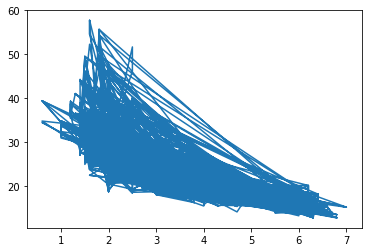

In [33]:
# line plot comb efficiency against displ - 
# each displ has multiple comb values, 
# making it difficult to display on a simple line plot
plt.plot(fuel_econ['displ'], fuel_econ['comb']);
print(fuel_econ['displ'].describe())

__The solution is to bin the x-axis variable and plot the means (with error bars using $plt.errorbar()$) of the y-axis variable for each x-axis bin__

In [34]:
# Set a number of bins into which the data will be grouped
# Set bin edges, and compute center of each bin (@0.2 step change)
bin_edges = np.arange(0.6, 7+0.2, 0.2)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Cut the bin values into discrete intervals. Returns a Series categorical dtype object
displ_binned = pd.cut(fuel_econ['displ'], bin_edges, include_lowest = True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

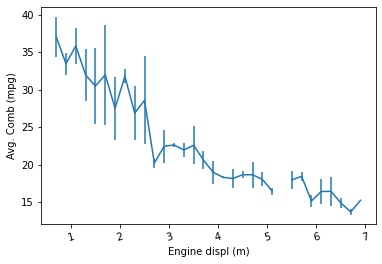

In [35]:
# For the points in each bin, we compute the mean and standard error of the mean
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

# Plot the summarised data with plt.errorbar
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)  # a line plot with error bars (@1 x std, not ci)
plt.xticks(rotation=15);
plt.xlabel('Engine displ (m)')
plt.ylabel('Avg. Comb (mpg)');

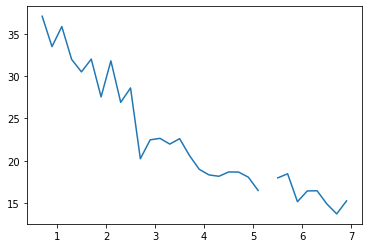

In [36]:
plt.plot(bin_centers, comb_mean);      # a regular line plot

# Q-Q plot

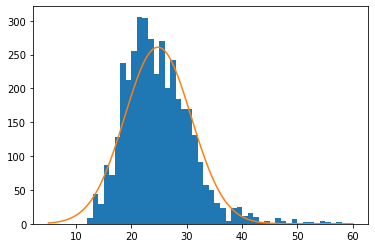

In [37]:
# create a histogram of the data
bin_size = 1
bin_edges = np.arange(5, 60 + 1, 1)
plt.hist(data=fuel_econ, x='comb', bins=bin_edges);

# overlay a theoretical normal distribution on top
samp_mean = fuel_econ['comb'].mean()
samp_sd = fuel_econ['comb'].std()

# scipy.stats.norm distribution
x = np.linspace(5, 60, 100)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= fuel_econ.shape[0] * bin_size # scale the distribution height

plt.plot(x, y);

__Q-Q plot tests if the normal distribution pdf above is a correct approximation of the true distribution of data__

proportions:
 [0.00000000e+00 2.54517689e-04 5.09035378e-04 ... 9.99236447e-01
 9.99490965e-01 9.99745482e-01]
expected_vals:
 [       -inf  3.92432021  5.06776758 ... 43.81852114 44.5149103
 45.65835767]


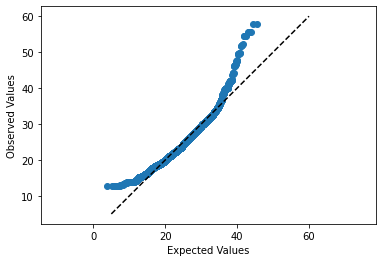

In [38]:
# norm.ppf - percent point function. The ppf takes as input a proportion (valued between 0 and 1),
# and returns the value in the distribution that would leave that proportion of the curve to the left.
n_points = fuel_econ.shape[0]
qs = (np.arange(n_points)) / n_points  # proportion (area to the left)

# data points (assumed) corresponding to the area to the left on a normal distribution
expected_vals = norm.ppf(qs, samp_mean, samp_sd)  
# data points (actual) sorted from the left most (i.e. smallest)
observed_vals = fuel_econ['comb'].sort_values()

# q-q plot
plt.scatter(expected_vals, observed_vals)  # must be of the same length
plt.plot([5, 60], [5, 60], '--', color='black')
plt.axis('equal')  # equal axis scaling
plt.xlabel('Expected Values')
plt.ylabel('Observed Values');

print('proportions:\n', qs)
print('expected_vals:\n', expected_vals)

So - Right skewed

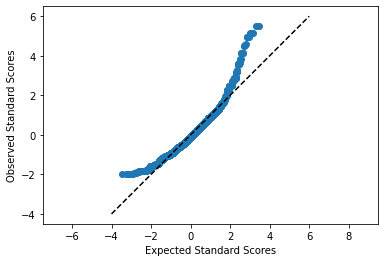

In [39]:
# scale the axes to standardised units
expected_scores = norm.ppf(qs)    # default to standard normal distribution
data_scores = (fuel_econ['comb'].sort_values() - samp_mean) / samp_sd   # standardisation wrt normal

# standardised q-q plot
plt.scatter(expected_scores, data_scores)
plt.plot([-4,6], [-4,6], '--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Standard Scores')
plt.ylabel('Observed Standard Scores');

Same as above but on a unit scale, i.e., 1, 2, 3 etc. * std from a mean / centre of 0

# Rug plot

__marginal distributions can be plotted alongside bivariate plots such as scatterplots with seaborn $rugplot$__

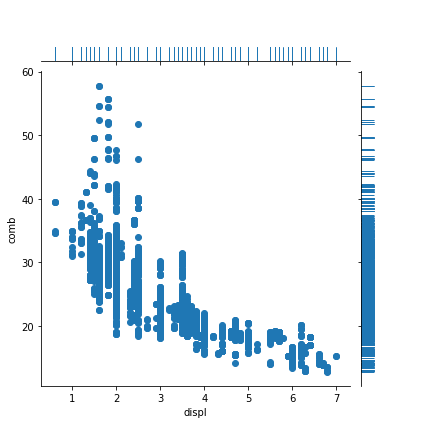

In [40]:
# Seaborn's JointGrid class enables plotting of bivariate relationship 
# with marginal univariate plots for numeric data
g = sns.JointGrid(data=fuel_econ, x='displ', y='comb')

# bivariate scatter plot for the main
g.plot_joint(plt.scatter)
# univariate rug plot for the marginals
g.plot_marginals(sns.rugplot, height=0.25);

# Multivariate plot

## Shape encoding

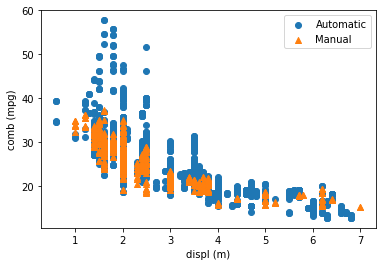

In [41]:
# set marker shapes for the third variable
ttype_markers = [['Automatic', 'o'],
                 ['Manual', '^']]

# Unfortunately, there is no built-in way to automatically assign different shapes in a single call
# Instead, we need to write a loop to call our plotting function multiple times, 
# isolating data points by categorical level and setting a different "marker" argument value for each one.
for ttype, marker in ttype_markers:
    plot_data = fuel_econ[fuel_econ['trans_type'] == ttype]
    plt.scatter(plot_data['displ'], plot_data['comb'], marker=marker, label=ttype)

plt.xlabel('displ (m)')
plt.ylabel('comb (mpg)')
plt.legend();

## Size encoding

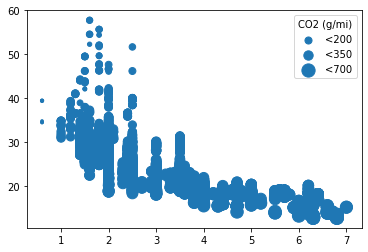

In [42]:
plt.scatter(x=fuel_econ['displ'], y=fuel_econ['comb'], s=fuel_econ['co2']/4)  # /4 to make size smaller

# dummy series for adding legend (label or marker does not accept lists)
sizes = [200, 350, 700]
base_color = sns.color_palette()[0]
legend_obj = []
for s in sizes:
    # dummy scatter object for legend labelling
    legend_obj.append(plt.scatter([], [], s=s/4, color=base_color, label='<'+str(s)))
plt.legend(title='CO2 (g/mi)');

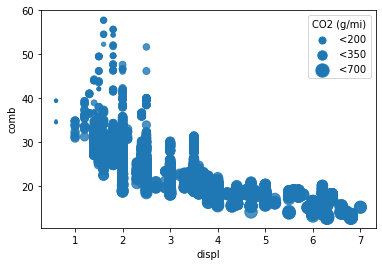

In [43]:
# or...using seaborn regplot with fit_reg disabled and size defined in scatter_kws
sns.regplot(x=fuel_econ['displ'],
            y=fuel_econ['comb'],
            fit_reg=False,
            scatter_kws={'s': fuel_econ['co2'] / 4});

# dummy series for adding legend (label or marker does not accept lists)
sizes = [200, 350, 700]
base_color = sns.color_palette()[0]
legend_obj = []
for s in sizes:
    # dummy scatter object for legend labelling
    legend_obj.append(plt.scatter([], [], s=s/4, color=base_color, label='<'+str(s)))
plt.legend(title='CO2 (g/mi)');

## Colour encoding

__use $FacetGrid$ for overlapped plots e.g. coloring of multivariate plots__

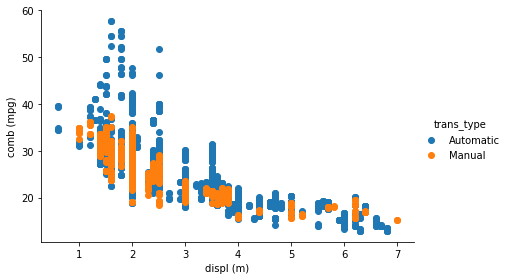

In [44]:
# setting a 'hue' in FacetGrid is suitable when the third variable does not have too many categories
g = sns.FacetGrid(data=fuel_econ,
                  hue='trans_type',  
                  hue_order=['Automatic', 'Manual'],  # set order to avoid one colour shadows the other
                  height=4,
                  aspect=1.5)

# map a scatter plot for the first two variables in the main
g.map(plt.scatter, 'displ', 'comb')

g.add_legend()
plt.xlabel('displ (m)')
plt.ylabel('comb (mpg)');

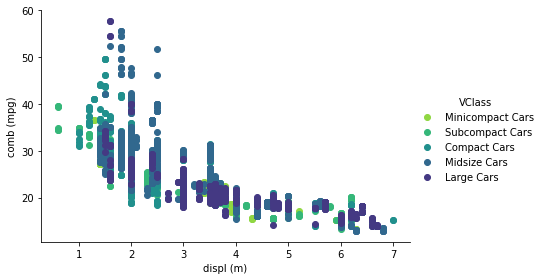

In [45]:
# qualitative (different colours) vs sequential (different colour intensities)
g = sns.FacetGrid(data=fuel_econ,
                  hue='VClass',  
                  palette='viridis_r',  # set a colour palette for sequential third variable
                  height=4,
                  aspect=1.5)

# map a scatter plot for the first two variables in the main
g.map(plt.scatter, 'displ', 'comb')

g.add_legend()
plt.xlabel('displ (m)')
plt.ylabel('comb (mpg)');

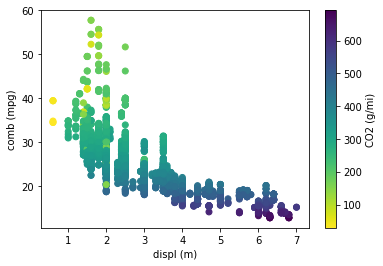

In [46]:
# when the third variable has too many categories:
# setting 'c' (and 'cmap') in matplotlib scatter instead of 'hue' in seaborn FacetGrid
plt.scatter(
    data=fuel_econ,
    x='displ',
    y='comb',
    c='co2',  # set c according to the third variable
    cmap='viridis_r'  # set palette for c Series
)

# add a colour bar
plt.colorbar(label='CO2 (g/mi)')

plt.xlabel('displ (m)')
plt.ylabel('comb (mpg)');

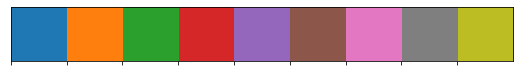

In [47]:
sns.palplot(sns.color_palette(n_colors=9))  # qualitative palettes - default - distinct

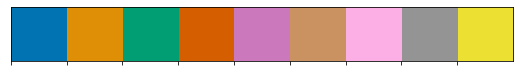

In [48]:
sns.palplot(sns.color_palette('colorblind', 9))  # qualitative palettes (red & green modified)

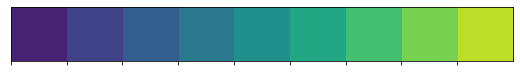

In [49]:
sns.palplot(sns.color_palette('viridis', 9))  # sequential palettes - dark-to-light

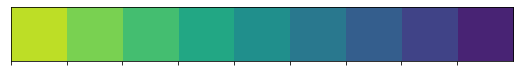

In [50]:
sns.palplot(sns.color_palette('viridis_r', 9))  # sequential palettes (light-to-dark reversed)

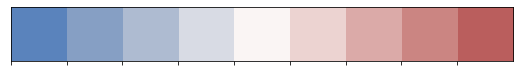

In [51]:
sns.palplot(sns.color_palette('vlag', 9))  # diverging palettes - bipolar white centre

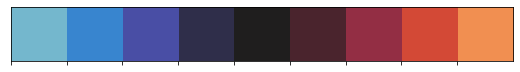

In [52]:
sns.palplot(sns.color_palette('icefire', 9))  # diverging palettes (black centre)

# Matrix of plots

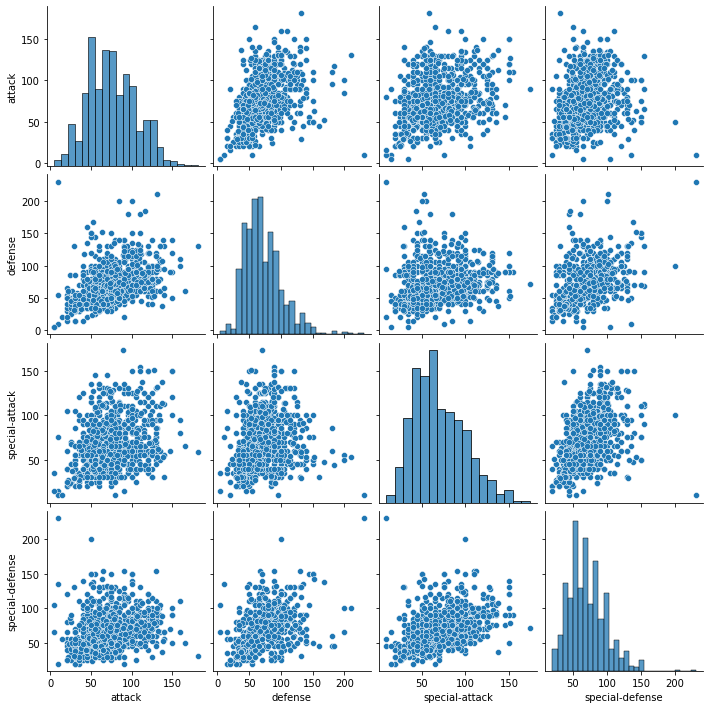

In [53]:
pkmn_stats = ['attack', 'defense', 'special-attack', 'special-defense']

g = sns.pairplot(data=pokemon, vars=pkmn_stats);  # setting 'vars' to view selected data columns

__use a $PairGrid$ with different plot types mapped on diagonal and off-diagonal of the grid__

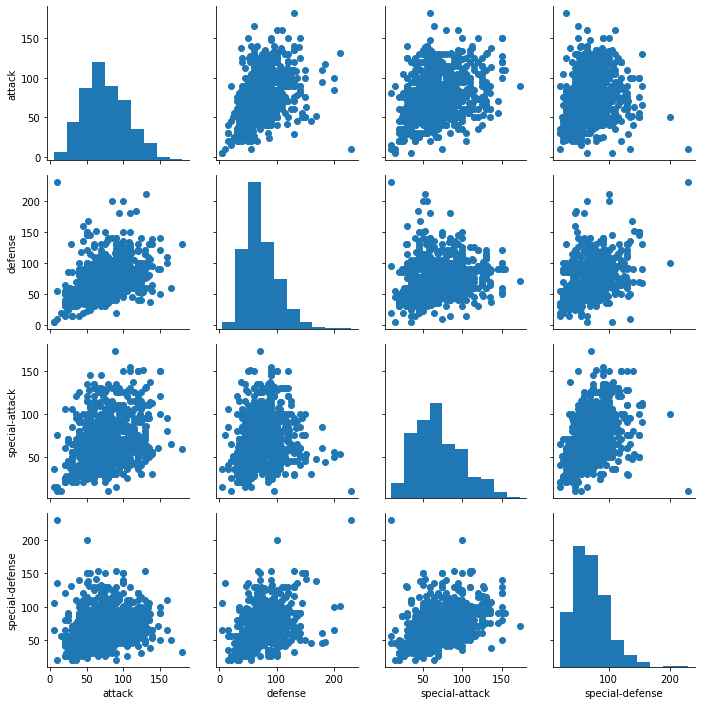

In [54]:
g = sns.PairGrid(data=pokemon, vars=pkmn_stats)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);  # this is equivalent to a seaborn pairplot

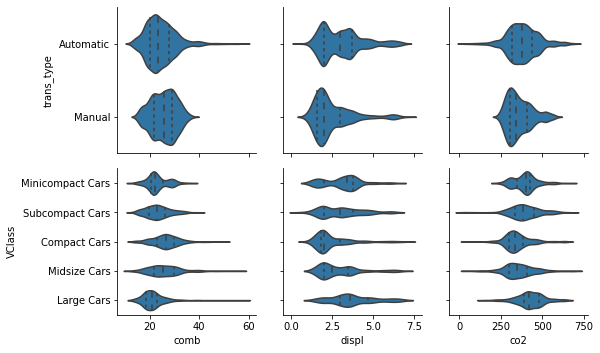

In [55]:
# PairGrid can be used to generate customised plot matrices 
# matrix of violin plots for 2 qualitative (y-axis) against 3 quantitative (x-axis) data
g = sns.PairGrid(data=fuel_econ,
                 x_vars=['comb', 'displ', 'co2'],
                 y_vars=['trans_type', 'VClass'])
g.map(sns.violinplot, inner='quartile', color=sns.color_palette()[0]);

# Feature engineering

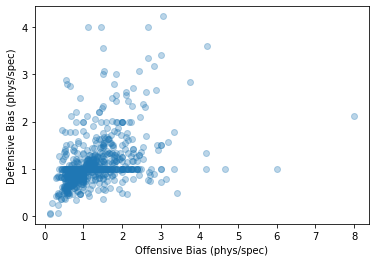

In [56]:
pokemon['atk_ratio'] = pokemon['attack'] / pokemon['special-attack']
pokemon['def_ratio'] = pokemon['defense'] / pokemon['special-defense']

plt.scatter(data=pokemon, x='atk_ratio', y='def_ratio', alpha= .3)
plt.xlabel('Offensive Bias (phys/spec)')
plt.ylabel('Defensive Bias (phys/spec)');

The problem is that a ratio of e.g. 1/4 (0.25) is not similarly distanced from 0 than a ratio of 4/1 (4).

__The solution is to transform the axes to log scale, so that:__
log(1/4) - 0 == 0 - log(4/1) 

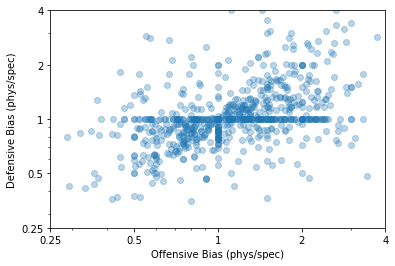

In [57]:
plt.scatter(data=pokemon, x='atk_ratio', y='def_ratio', alpha= .3)
plt.xlabel('Offensive Bias (phys/spec)')
plt.ylabel('Defensive Bias (phys/spec)');

# set on log scale to expand clustered 0-1 ratio region
plt.xscale('log')
plt.yscale('log')

tick_loc = [0.25, 0.5, 1, 2, 4]  # 1/4, 1/2, 1, 2/1, 4/1 etc. now evenly spaced
plt.xticks(tick_loc, tick_loc)
plt.yticks(tick_loc, tick_loc)
plt.xlim(0.25, 4)
plt.ylim(0.25, 4);